In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv("apple_products.csv")

In [22]:
print(data.head())

                               Product Name  \
0         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2             APPLE iPhone 8 (Gold, 256 GB)   
3   APPLE iPhone 8 Plus (Space Grey, 64 GB)   
4       APPLE iPhone XS Max (Silver, 64 GB)   

                                         Product URL  Brand  Sale Price  \
0  https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2  https://www.flipkart.com/apple-iphone-8-gold-2...  Apple       77000   
3  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       49900   
4  https://www.flipkart.com/apple-iphone-xs-max-s...  Apple       89900   

     Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
0  77060                   35               9847                356   
1  84900                    0               3431                356   
2  77000                    0              11202     

In [23]:
print(data.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Star Rating            0
Ram                    0
Unit Sold              0
dtype: int64


In [24]:
print(data.tail(5))

                                      Product Name  \
56     APPLE iPhone 15 Pro (Blue Titanium, 512 GB)   
57      APPLE iPhone 15 Pro (Black Titanium, 1 TB)   
58   APPLE iPhone 15 Pro Max(Black Titanium, 1 TB)   
59  APPLE iPhone 15 Pro Max(Blue Titanium, 256 GB)   
60  APPLE iPhone 15 Pro Max(Blue Titanium, 512 GB)   

                                          Product URL  Brand  Sale Price  \
56  https://www.flipkart.com/apple-iphone-15-pro-b...  Apple      158990   
57  https://www.flipkart.com/apple-iphone-15-pro-b...  Apple      177990   
58  https://www.flipkart.com/apple-iphone-15-pro-m...  Apple      188900   
59  https://www.flipkart.com/apple-iphone-15-pro-m...  Apple      148900   
60  https://www.flipkart.com/apple-iphone-15-pro-m...  Apple      168900   

       Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
56  164900                    3                987                 49   
57  184900                    3                577                 49   

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         61 non-null     object 
 1   Product URL          61 non-null     object 
 2   Brand                61 non-null     object 
 3   Sale Price           61 non-null     int64  
 4   Mrp                  61 non-null     int64  
 5   Discount Percentage  61 non-null     int64  
 6   Number Of Ratings    61 non-null     int64  
 7   Number Of Reviews    61 non-null     int64  
 8   Star Rating          61 non-null     float64
 9   Ram                  61 non-null     object 
 10  Unit Sold            61 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 5.4+ KB
None


In [26]:
print(data.describe())

          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      61.000000      61.000000            61.000000          61.000000   
mean    98285.918033  106338.196721             8.442623       30521.573770   
std     40381.540280   40022.120030             7.381338       71688.806897   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     59999.000000   74900.000000             4.000000         789.000000   
50%     99900.000000  109900.000000             6.000000        2134.000000   
75%    129900.000000  134900.000000            13.000000       11202.000000   
max    188900.000000  199900.000000            35.000000      282930.000000   

       Number Of Reviews  Star Rating      Unit Sold  
count          61.000000    61.000000      61.000000  
mean         1742.409836     4.595082   40674.557377  
std          3432.050409     0.064359   94919.854681  
min            42.000000     4.500000     876.000000  
25%          

In [27]:
highest_rated = data.sort_values(by=["Star Rating"], 
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated['Product Name'])

48             APPLE iPhone 14 Pro Max(Silver, 512 GB)
7     APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
41              APPLE iPhone 13 Pro Max (Gold, 128 GB)
40                APPLE iPhone 13 Pro (Silver, 128 GB)
49             APPLE iPhone 14 Pro Max(Silver, 256 GB)
50               APPLE iPhone 14 Pro Max(Gold, 128 GB)
8          APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
54      APPLE iPhone 15 Pro (natural Titanium, 128 GB)
55        APPLE iPhone 15 Pro (White Titanium, 256 GB)
56         APPLE iPhone 15 Pro (Blue Titanium, 512 GB)
Name: Product Name, dtype: object


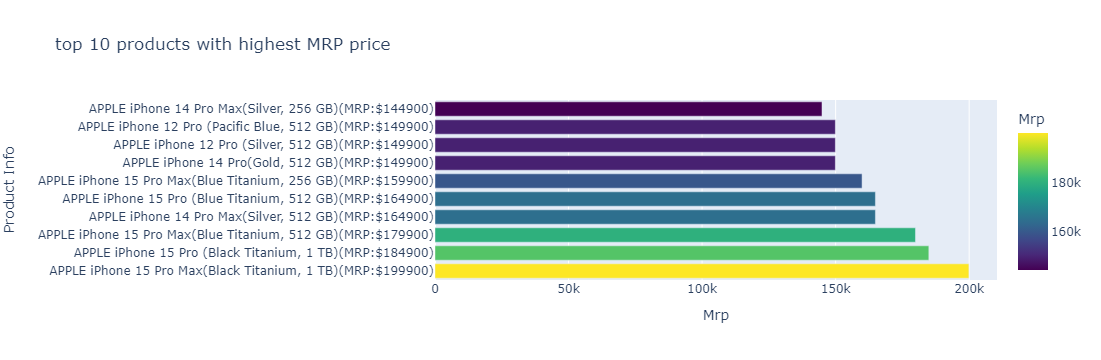

In [28]:
high=data.sort_values(by="Mrp",ascending=False)
top=high.head(10).copy()
top['Product Info']=top['Product Name']+'(MRP:$'+top['Mrp'].astype(str)+')'
fig=px.bar(top,
           x='Mrp',
           y='Product Info',
           orientation='h',
           title='top 10 products with highest MRP price',
           color='Mrp',
           color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

In [29]:
highest_sold = data.sort_values(by=["Unit Sold"], 
                                 ascending=False)
highest_sold = highest_sold.head(10)
print(highest_sold['Product Name'])

39                   APPLE iPhone 13 (Midnight, 128 GB)
43                     APPLE iPhone 14 (Purple, 256 GB)
42                  APPLE iPhone 14 (Starlight, 128 GB)
44                     APPLE iPhone 14 (Purple, 512 GB)
34                       APPLE iPhone SE (White, 64 GB)
35                      APPLE iPhone SE (White, 128 GB)
12    Apple iPhone SE (White, 256 GB) (Includes EarP...
36                      APPLE iPhone 11 (Black, 128 GB)
5     Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...
6     Apple iPhone XR (Black, 64 GB) (Includes EarPo...
Name: Product Name, dtype: object


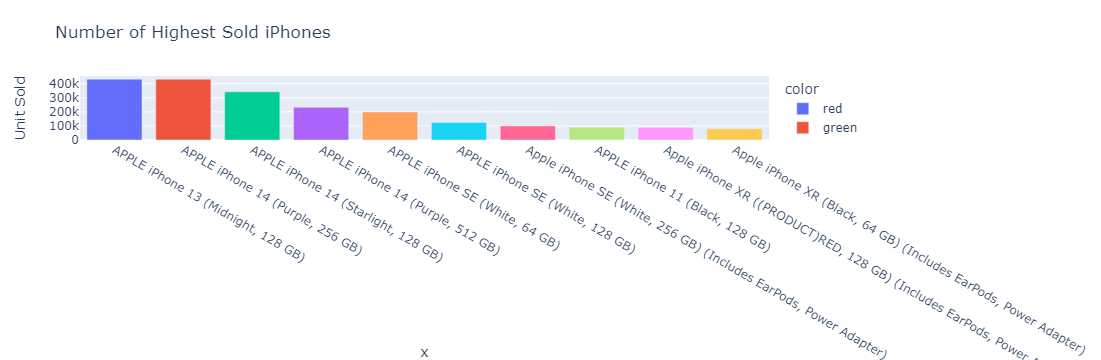

In [30]:
iphones = highest_sold["Product Name"].value_counts()
label = iphones.index
counts = highest_sold["Unit Sold"]
figure = px.bar(highest_sold, x=label, 
                y = counts, color=['red','green','pink','yellow','blue','purple','brown','black','magenta','orange'],
            title="Number of Highest Sold iPhones")
figure.show()

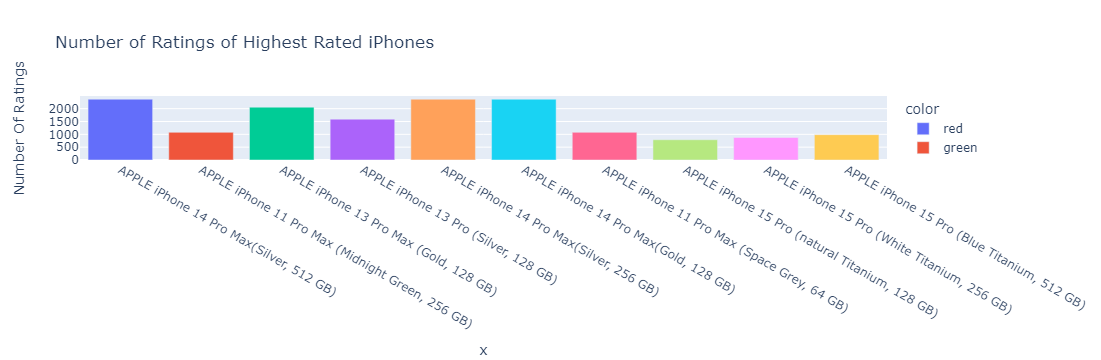

In [31]:
iphones = highest_rated["Product Name"].value_counts()
label = iphones.index
counts = highest_rated["Number Of Ratings"]
figure = px.bar(highest_rated, x=label, 
                y = counts, color=['red','green','pink','yellow','blue','purple','brown','black','magenta','orange'],
            title="Number of Ratings of Highest Rated iPhones")
figure.show()

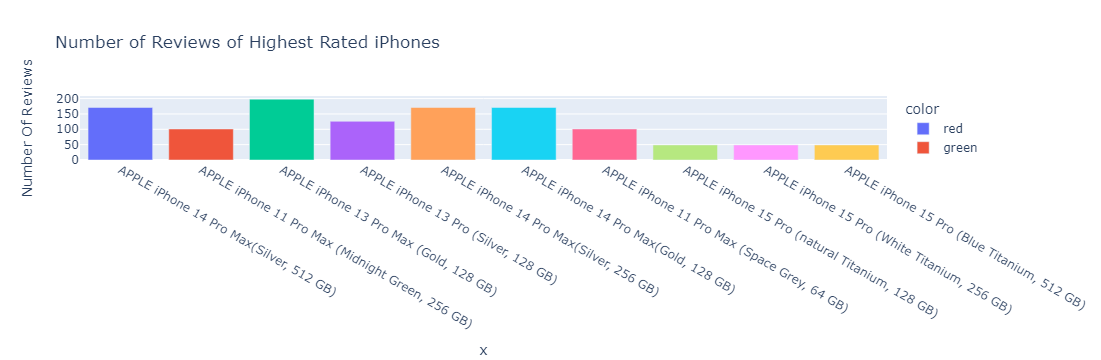

In [32]:
iphones = highest_rated["Product Name"].value_counts()
label = iphones.index
counts = highest_rated["Number Of Reviews"]
figure = px.bar(highest_rated, x=label, 
                y = counts, color=['red','green','pink','yellow','blue','purple','brown','black','magenta','orange'],
            title="Number of Reviews of Highest Rated iPhones")
figure.show()

In [2]:
features=['Mrp','Discount Percentage']
target='Sale Price'
X=data[features]
y=data[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
try:
    new_data=pd.DataFrame([[49956,15],[48675,16]],columns=features)
    predicted_sale_prices=model.predict(new_data)
    for i,predicted_sale_price in enumerate(predicted_sale_prices):
        print(f"Predicted sale price{i+1}:₹{predicted_sale_price:2f}")
except Exception as e:
    print(f"Error:{e}")

Predicted sale price1:₹42995.549845
Predicted sale price2:₹41734.757919


Mean Squared Error: 10497634.734118693


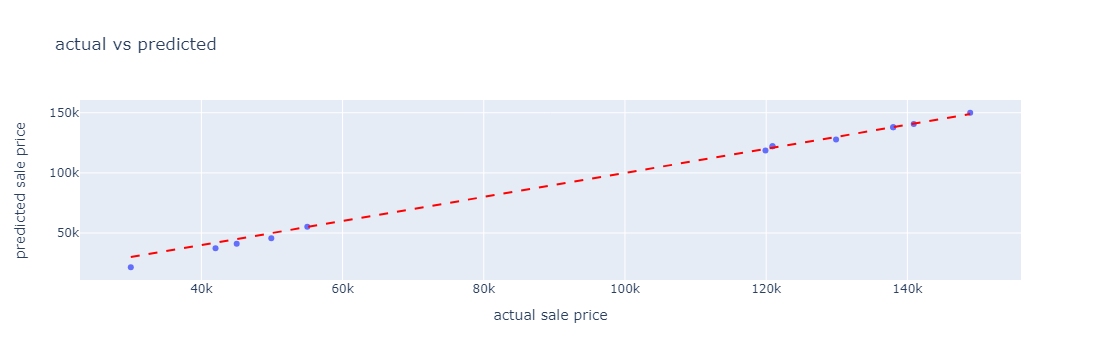

In [34]:
features=['Mrp','Discount Percentage']
target='Sale Price'
X=data[features]
y=data[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
results_df=pd.DataFrame({'actual sale price':y_test,'predicted sale price':y_pred})
fig=px.scatter(results_df,x='actual sale price',y='predicted sale price',title='actual vs predicted')
fig.add_shape(type='line',
              x0=results_df['actual sale price'].min(),y0=results_df['actual sale price'].min(),
              x1=results_df['actual sale price'].max(),y1=results_df['actual sale price'].max(),
              line=dict(color='red',dash='dash'),
              name="predicted")
                     
fig.show()

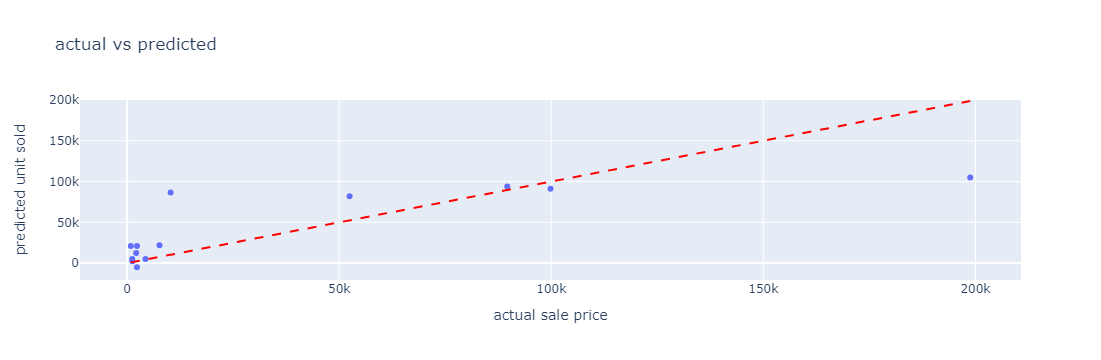

In [35]:
features=['Sale Price']
target='Unit Sold'
X=data[features]
y=data[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
results_df=pd.DataFrame({'actual sale price':y_test,'predicted unit sold':y_pred})
fig=px.scatter(results_df,x='actual sale price',y='predicted unit sold',title='actual vs predicted')
fig.add_shape(type='line',
              x0=results_df['actual sale price'].min(),y0=results_df['actual sale price'].min(),
              x1=results_df['actual sale price'].max(),y1=results_df['actual sale price'].max(),
              line=dict(color='red',dash='dash'),
              name="predicted")
                     
fig.show()

In [5]:
features=['Sale Price']
target='Unit Sold'
X=data[features]
y=data[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
try:
    new_data=pd.DataFrame([[49956],[47568]],columns=features)
    predicted_unit_solds=model.predict(new_data)
    for i,predicted_unit_sold in enumerate(predicted_unit_solds):
        print(f"Predicted unit sold{i+1}:{predicted_unit_sold:2f}")
except Exception as e:
    print(f"Error:{e}")

Predicted unit sold1:86573.971108
Predicted unit sold2:88786.048607
